# Predicting the costs of used cars 

### Features: <font size=3>
<ul>
<li>Name: The brand and model of the car.</li>
<li>Location: The location in which the car is being sold or is available for purchase.</li>
<li>Year: The year or edition of the model.</li>
<li>Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.</li>
<li>Fuel_Type: The type of fuel used by the car.</li>
<li>Transmission: The type of transmission used by the car.</li>
<li>Owner_Type: Whether the ownership is Firsthand, Second hand or other.</li>
<li>Mileage: The standard mileage offered by the car company in kmpl or km/kg</li>
<li>Engine: The displacement volume of the engine in cc.</li>
<li>Power: The maximum power of the engine in bhp.</li>
<li>Seats: The number of seats in the car.</li>
<li>Price: The price of the used car in INR Lakhs.</li>
</ul>

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [141]:
cars = pd.read_excel("Data_Train (1).xlsx")
cars.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [143]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [144]:
cars.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

We have-
1. 2 null values in Mileage
2. 36 null values in Engine
3. 36 null values in Power
4. 42 null values in Seats

Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

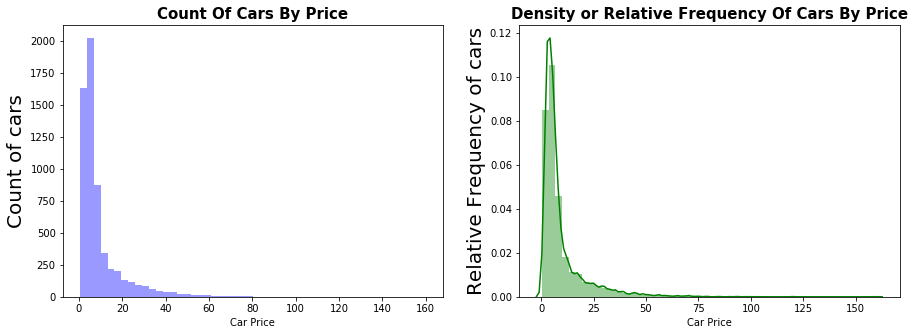

In [145]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(cars['Price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=20)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(cars['Price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=20)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

# Observations on Target Variable- Price:

The target variable price has a positive skew, however majority of the cars are low priced.

More than 50% of the cars are priced between 2 to 15 lakhs and close to 17% cars are priced between 20 to 40 lakhs. So around 85% of cars in market are priced between 2 to 40lakhs.

In [146]:
cars.Price.min()

0.44

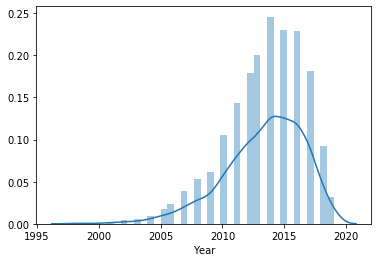

In [147]:
sns.distplot(cars['Year'])

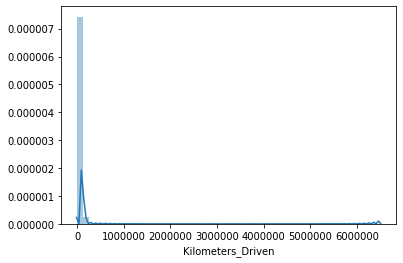

In [148]:
sns.distplot(cars['Kilometers_Driven'])

Text(0.5, 1.0, 'City')

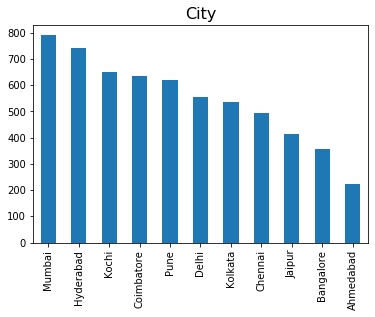

In [149]:
cars.Location.value_counts().plot(kind='bar')
plt.title("City",fontdict={'fontsize':16})

Cars are mostly purchased in Mumbai and Hyderabad citites.

Text(0.5, 1.0, 'Year')

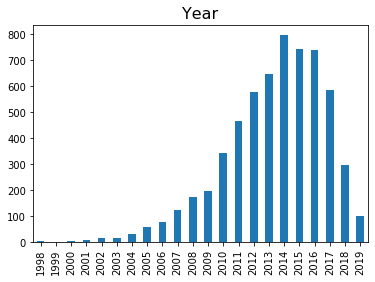

In [150]:
cars.Year.value_counts().sort_index().plot(kind='bar')
plt.title("Year",fontdict={'fontsize':16})

Sale of cars increased from 1999-2014 and then decreased to some extent during 2014-2019

Text(0.5, 1.0, 'Owner_type')

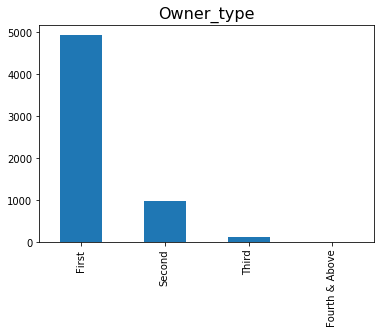

In [151]:
cars.Owner_Type.value_counts().plot(kind='bar')
plt.title("Owner_type",fontdict={'fontsize':16})

Most of the people prefered first hand i.e, new cars.

Text(0.5, 1.0, 'Transmission')

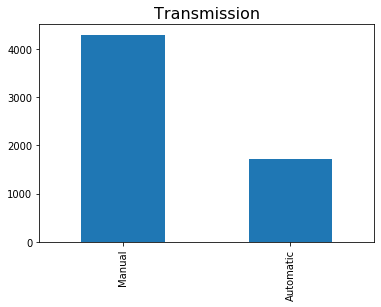

In [152]:
cars.Transmission.value_counts().plot(kind='bar')
plt.title("Transmission",fontdict={'fontsize':16})


More than 50% opted for manual driving cars

Text(0.5, 1.0, 'Price')

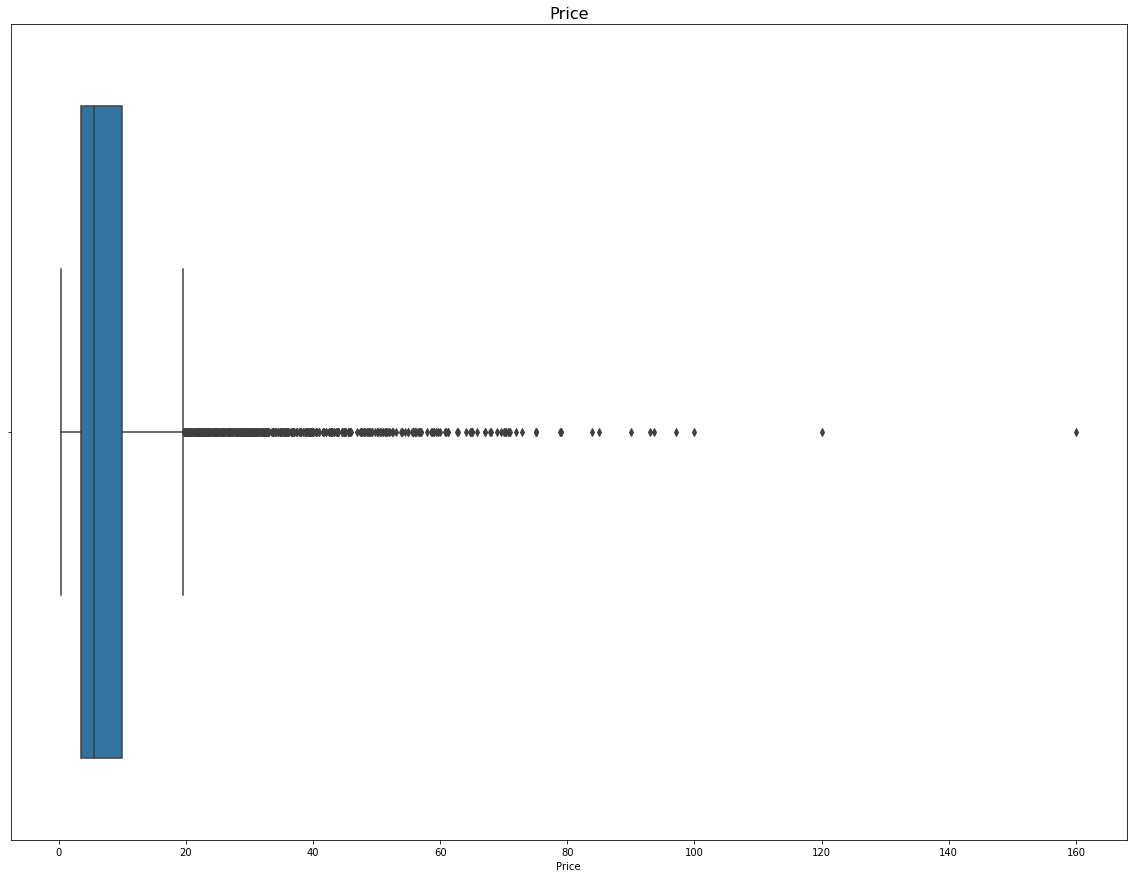

In [153]:
plt.figure(figsize=(20,15))
sns.boxplot(cars['Price'])
plt.title("Price",fontdict={'fontsize':16})

Most of the people opted to buy cars in the range 3,00,000-10,00,000


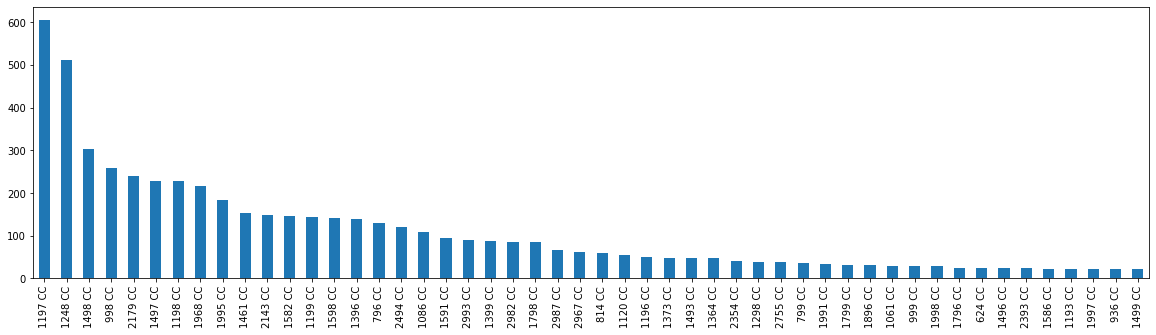

In [154]:
plt.figure(figsize=(20,5))
cars['Engine'].value_counts().head(50).plot.bar()

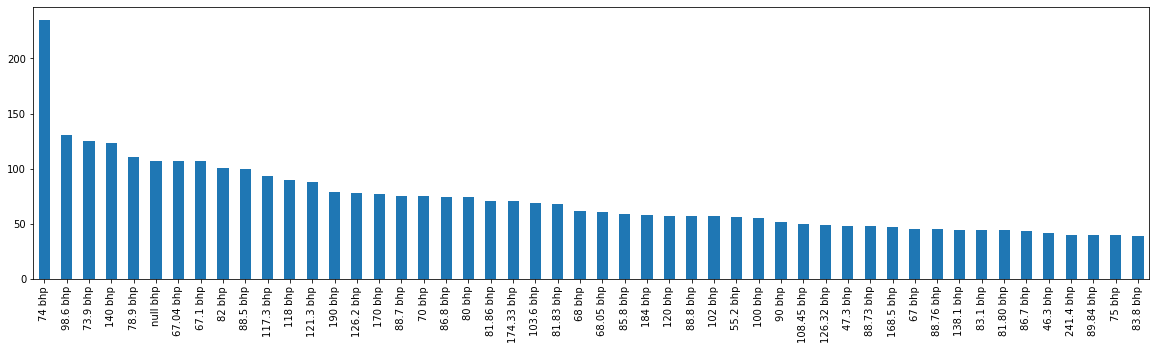

In [155]:
plt.figure(figsize=(20,5))
cars['Power'].value_counts().head(50).plot.bar()

In [159]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


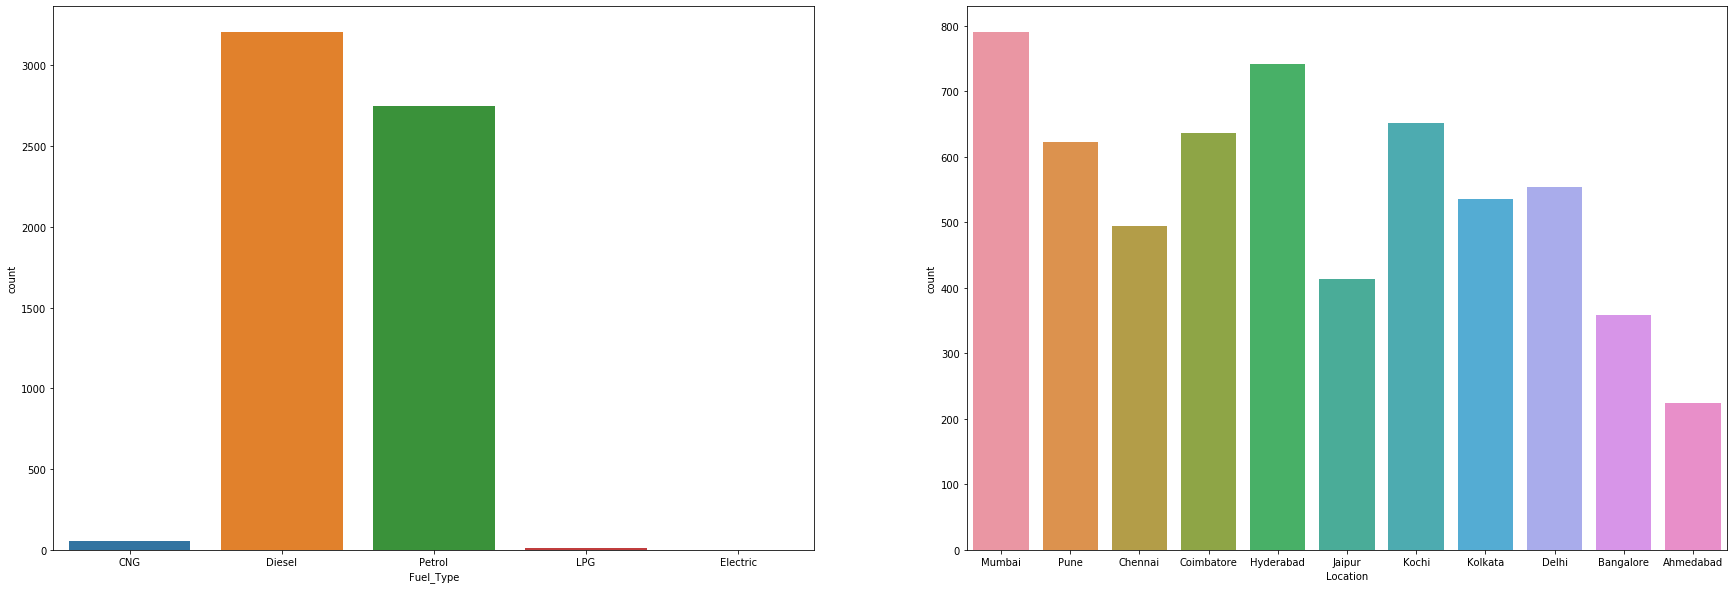

In [161]:
# Categorical variables visualisation
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(x='Fuel_Type',data=cars)
plt.subplot(1,2,2)
sns.countplot(x='Location',data=cars)
plt.show()

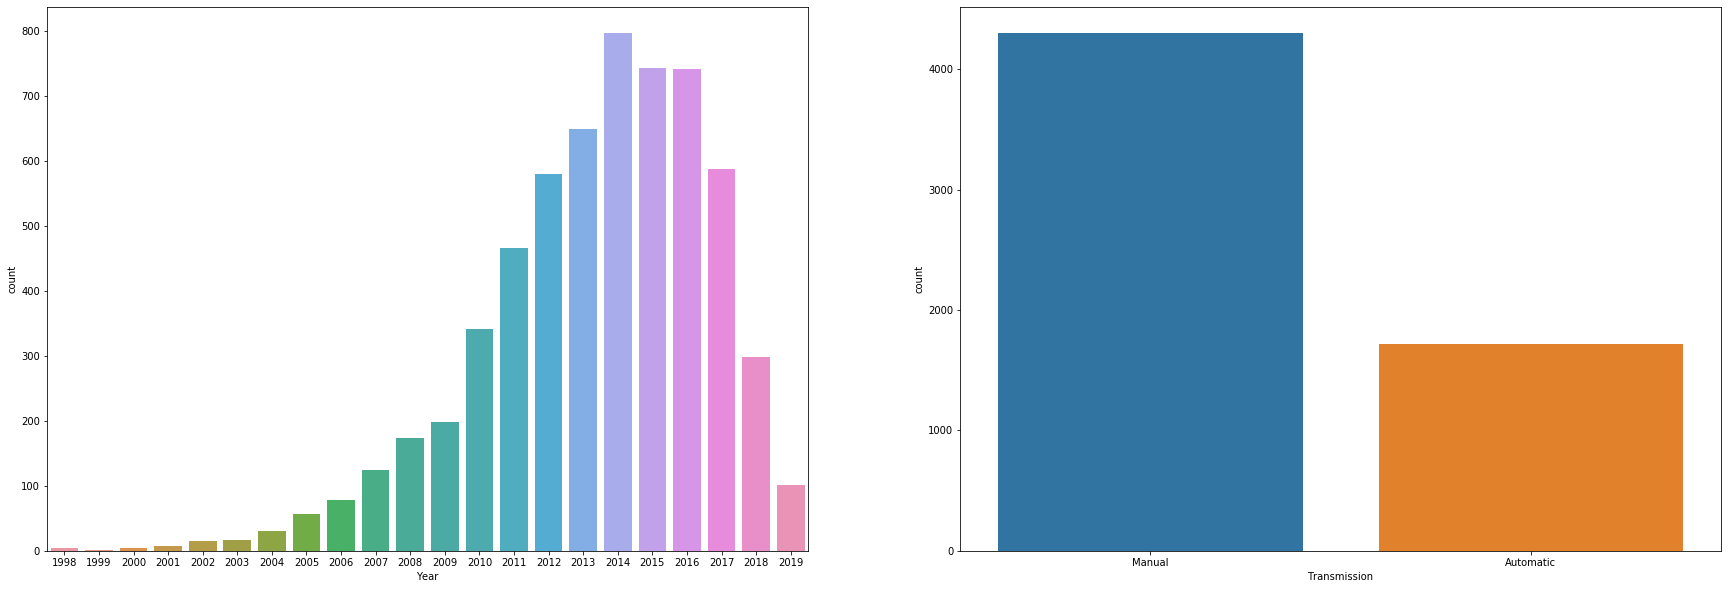

In [162]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(x='Year',data=cars)
plt.subplot(1,2,2)
sns.countplot(x='Transmission',data=cars)
plt.show()

In [71]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [72]:
Name=cars["Name"].str.split(" ",n =5,expand = True)
cars.drop(['Name'],axis=1,inplace=True)
cars=pd.concat([cars,Name],axis=1)


In [73]:
cars.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,0,1,2,3,4,5
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R,LXI,CNG,None
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6,CRDi,SX,Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V,None,None,None
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI,None,None,None
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New,2.0,TDI,Multitronic


In [74]:
cars["Mileage"]= cars["Mileage"].str.split(" ",n =1,expand = True)
cars["Mileage"]= cars["Mileage"][0]
cars["Engine"]= cars["Engine"].str.split(" ",n =1,expand = True)
cars["Engine"]= cars["Engine"][0]
cars["Power"]= cars["Power"].str.split(" ",n =1,expand = True)
cars["Power"]= cars["Power"][0]

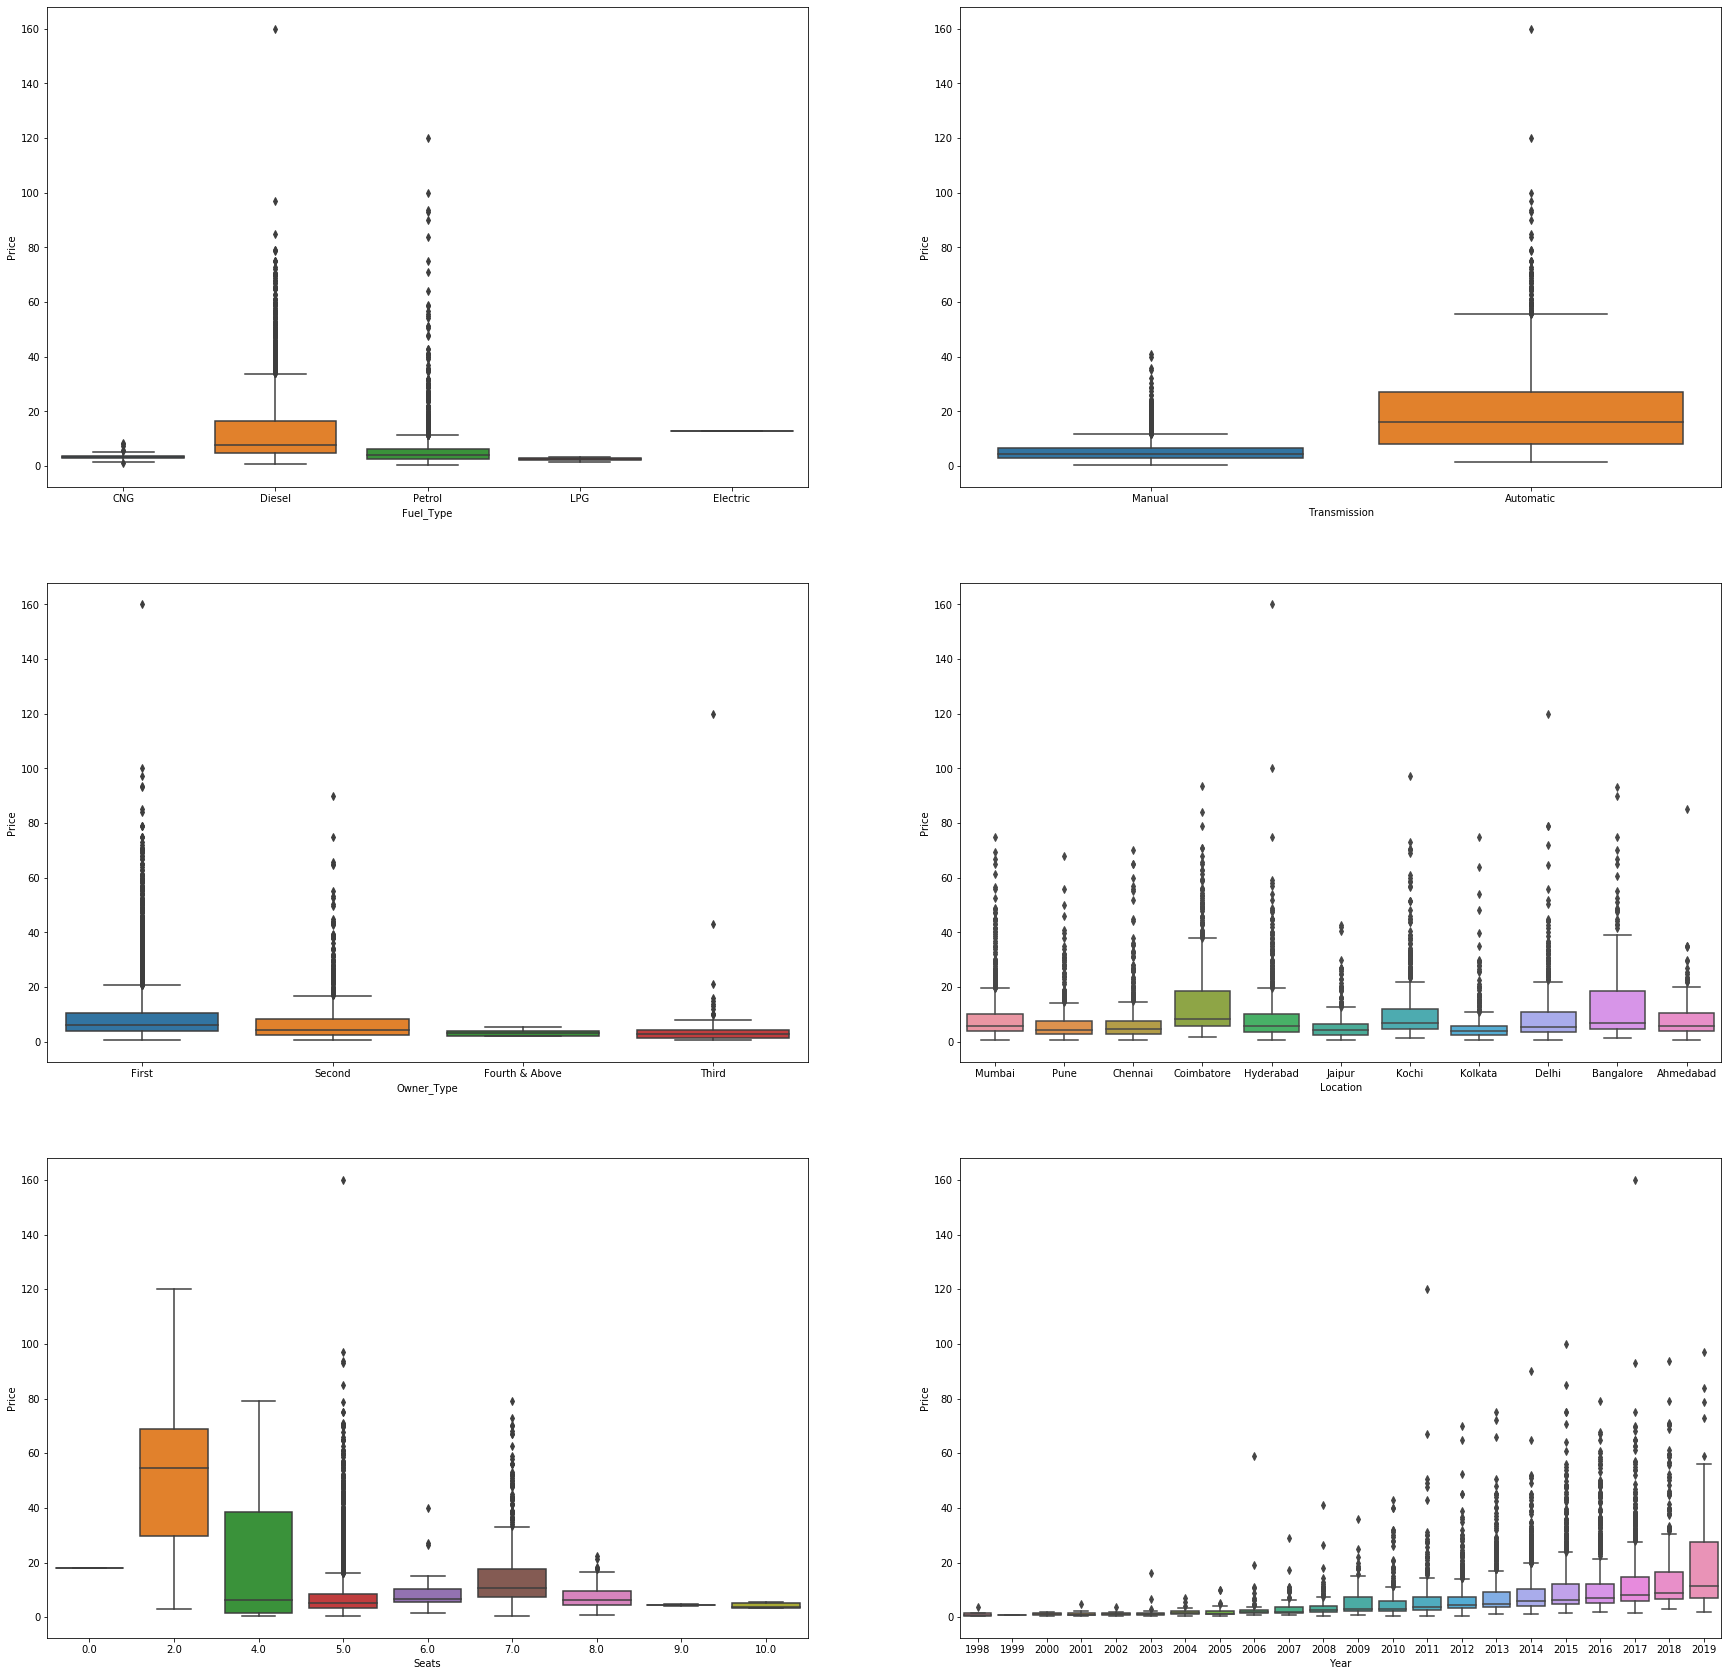

In [75]:
plt.figure(figsize = (30,30))
plt.subplot(3,2,1)
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = cars)
plt.subplot(3,2,2)
sns.boxplot(x = 'Transmission', y = 'Price', data = cars)
plt.subplot(3,2,3)
sns.boxplot(x = 'Owner_Type', y = 'Price', data = cars)
plt.subplot(3,2,4)
sns.boxplot(x = 'Location', y = 'Price', data = cars)
plt.subplot(3,2,5)
sns.boxplot(x = 'Seats', y = 'Price', data = cars)
plt.subplot(3,2,6)
sns.boxplot(x = 'Year', y = 'Price', data = cars)

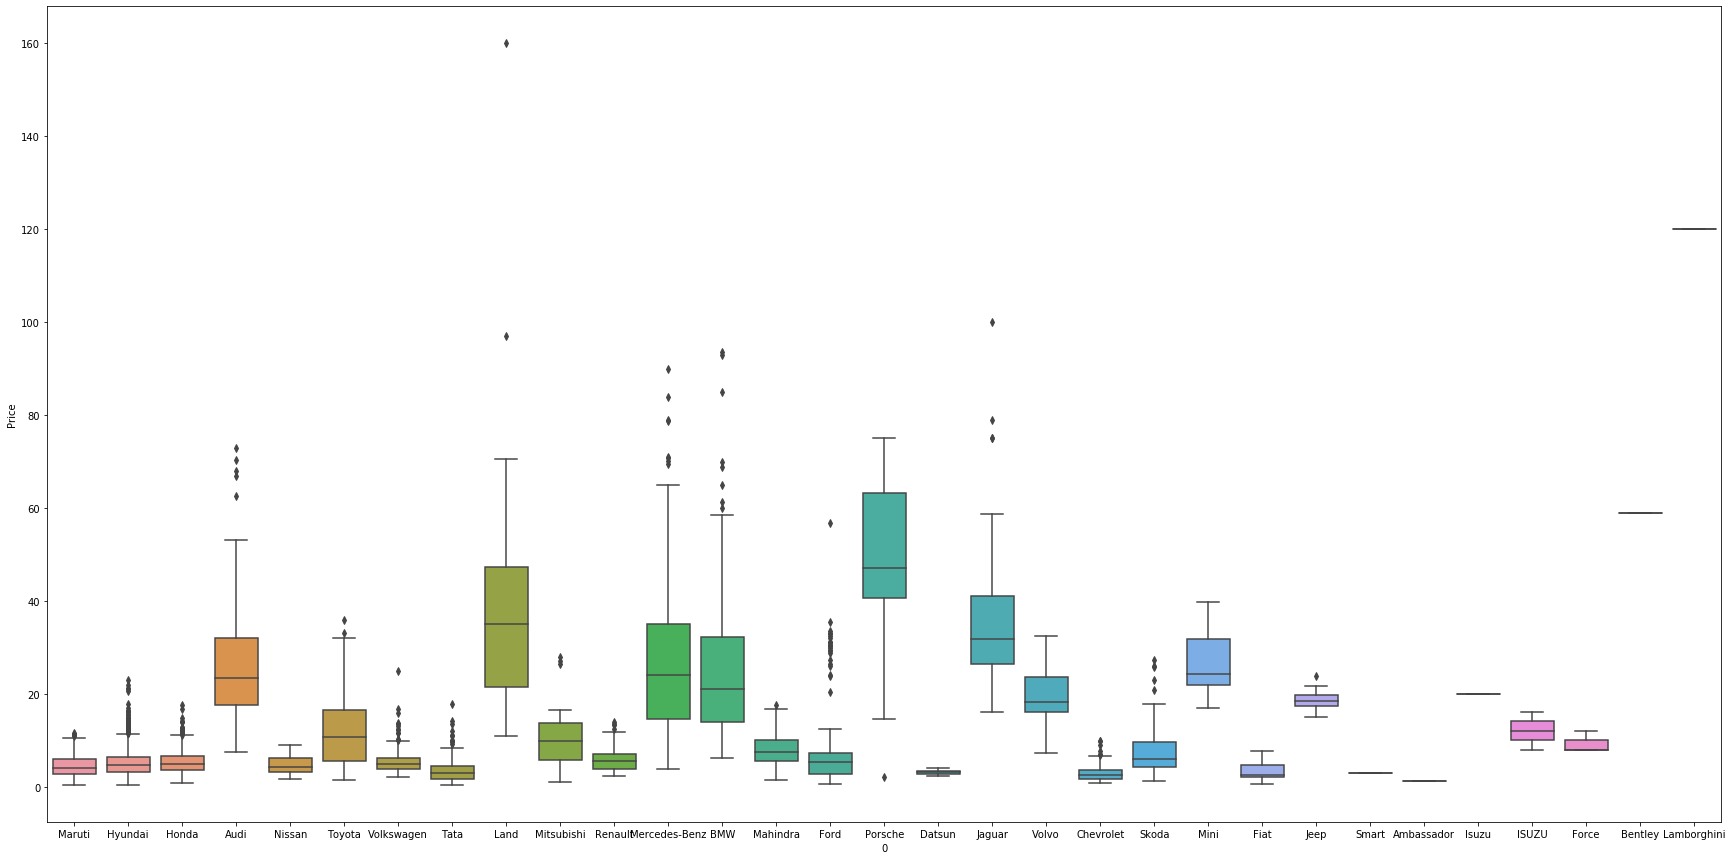

In [76]:
plt.figure(figsize = (30,15))
sns.boxplot(x = 0, y = 'Price', data = cars)

1. From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Audi, LandRover    , Bmw, Jaguar and Porsche.
2. Whereas the lower priced cars belong to Maruti, Hyundai, Honda, Nissan, Tata, Ford, Fiat and Chevrolet.
3. The median price of gas vehicles is lower than that of Diesel Vehicles.
4. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles. 

Model selection by assigning dummies

In [77]:
Brand=pd.get_dummies(cars[0],drop_first=True)
Model=pd.get_dummies(cars[1],drop_first=True)
Version=pd.get_dummies(cars[2],drop_first=True)
type1=pd.get_dummies(cars[3],drop_first=True)
type2=pd.get_dummies(cars[4],drop_first=True)
type3=pd.get_dummies(cars[5],drop_first=True)
Location=pd.get_dummies(cars['Location'],drop_first=True)
Fuel_Type=pd.get_dummies(cars['Fuel_Type'],drop_first=True)
Transmission=pd.get_dummies(cars['Transmission'],drop_first=True)
Owner_Type=pd.get_dummies(cars['Owner_Type'],drop_first=True)

In [78]:
cars.drop([0,1,2,3,4,5,'Location','Fuel_Type','Transmission',
              'Owner_Type'],axis=1,inplace=True)

In [79]:
cars=pd.concat([cars,Brand,Model,Version,type1,type2,type3,Location,Fuel_Type,Transmission,
           Owner_Type],axis=1)

In [80]:
cars.head(1000)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Audi,BMW,Bentley,...,Mumbai,Pune,Diesel,Electric,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,26.6,998,58.16,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,26.6,998,58.16,5.0,4.50,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,26.6,998,58.16,7.0,6.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,26.6,998,58.16,5.0,17.74,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2015,11000,26.6,998,58.16,5.0,16.00,0,0,0,...,0,1,0,0,0,1,0,0,0,0
996,2008,93000,26.6,998,58.16,5.0,1.45,0,0,0,...,0,1,0,0,0,1,1,0,0,0
997,2017,24852,26.6,998,58.16,5.0,8.08,0,0,0,...,0,0,1,0,0,0,0,0,0,0
998,2014,37632,26.6,998,58.16,5.0,4.50,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [81]:
X=cars[cars.Price<80].drop(['Price'],axis=1)
y=cars[cars.Price<80]['Price']

In [82]:
from sklearn.impute import SimpleImputer

#Training Set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X)
X = imputer.transform(X)

In [83]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Scaling Original Training Data
X = sc.fit_transform(X)
# # y = sc.fit_transform(y)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=101)

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import math
from math import log

In [86]:
hyperparameters= dict(n_estimators=[1,2,4,8,16,32,64,100,200], max_depth=np.linspace(1,32,32, endpoint=True),min_samples_split=[1,2,5,10,15,100],min_samples_leaf=[1,2,5,10],max_features=[math.log2,math.sqrt, None])

In [87]:
clf=RandomizedSearchCV(RandomForestRegressor(), hyperparameters, random_state=1, cv=5, verbose=0,scoring='neg_mean_squared_error')

In [88]:
 best_model=clf.fit(X_train,y_train)

In [89]:
best_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 32.0}

In [90]:
clf=RandomForestRegressor(n_estimators=200,
                         min_samples_split=10,
                         min_samples_leaf=2,
                          max_features=None,
                         max_depth=32.0)

In [91]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=32.0, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
y_pred=clf.predict(X_test)

In [93]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8577463452592375

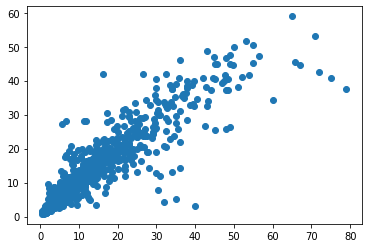

In [94]:
plt.scatter(y_test, y_pred)

In [95]:
from sklearn import metrics

In [96]:
metrics.explained_variance_score(y_test, y_pred)

0.857958040890662

In [101]:
metrics.mean_absolute_error(y_test, y_pred)

1.6972321634299912

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_pred))
print(rms)

3.8022232245543135


In [103]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 1.6972321634299912


In [111]:
#Test set
cars_test = pd.read_excel("Data_Test (1).xlsx")
cars_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [112]:
cars_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [113]:
Name=cars_test["Name"].str.split(" ",n =5,expand = True)
cars_test.drop(['Name'],axis=1,inplace=True)
cars_test=pd.concat([cars_test,Name],axis=1)

In [114]:
cars_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,0,1,2,3,4,5
0,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti,Alto,K10,LXI,CNG,None
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto,800,2016-2019,LXI,None
2,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova,Crysta,Touring,Sport,2.4 MT
3,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios,Liva,GD,None,None
4,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20,Magna,None,None,None


In [115]:
cars_test["Mileage"]= cars_test["Mileage"].str.split(" ",n =1,expand = True)
cars_test["Mileage"]= cars_test["Mileage"][0]
cars_test["Engine"]= cars_test["Engine"].str.split(" ",n =1,expand = True)
cars_test["Engine"]= cars_test["Engine"][0]
cars_test["Power"]= cars_test["Power"].str.split(" ",n =1,expand = True)
cars_test["Power"]= cars_test["Power"][0]

In [116]:
Brand=pd.get_dummies(cars_test[0],drop_first=True)
Model=pd.get_dummies(cars_test[1],drop_first=True)
Version=pd.get_dummies(cars_test[2],drop_first=True)
type1=pd.get_dummies(cars_test[3],drop_first=True)
type2=pd.get_dummies(cars_test[4],drop_first=True)
type3=pd.get_dummies(cars_test[5],drop_first=True)
Location=pd.get_dummies(cars_test['Location'],drop_first=True)
Fuel_Type=pd.get_dummies(cars_test['Fuel_Type'],drop_first=True)
Transmission=pd.get_dummies(cars_test['Transmission'],drop_first=True)
Owner_Type=pd.get_dummies(cars_test['Owner_Type'],drop_first=True)

In [117]:
cars_test.drop([0,1,2,3,4,5,'Location','Fuel_Type','Transmission',
              'Owner_Type'],axis=1,inplace=True)

cars_test=pd.concat([cars_test,Brand,Model,Version,type1,type2,type3,Location,Fuel_Type,Transmission,
           Owner_Type],axis=1)

In [118]:
cars_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,BMW,Bentley,Chevrolet,Datsun,...,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual,Fourth & Above,Second,Third
0,2014,40929,32.26,998,58.2,4.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,32.26,998,58.2,5.0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,32.26,998,58.2,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,32.26,998,58.2,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,32.26,998,58.2,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [52]:
X=cars_test

In [53]:
from sklearn.impute import SimpleImputer

#Training Set Imputation
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer = imputer.fit(X)
X = imputer.transform(X)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Scaling Original Test Data
X_test_set = sc.fit_transform(X)

Predicting the price of the cars present in the test test

In [54]:
y_pred_test_set=clf.predict(X_test_set)

ValueError: Number of features of the model must match the input. Model n_features is 1675 and input n_features is 1026 

# Opting for Label Encoder in order to overcome the above problem

In [713]:
df=pd.read_excel('Data_Train (1).xlsx')
dt=pd.read_excel('Data_Test (1).xlsx')

# Data Cleaning

In [714]:
# Spliting "Name" Feature to 'Brand', 'CarName' and 'Model'.
def splitName(x):
    x['Brand']   = x['Name'].apply(lambda x: x.split(' ')[0].strip())
    x['CarName'] = x['Name'].apply(lambda x: x.split(' ')[1].strip())
    x['Model'] = x['Name'].apply(lambda x:' '.join(x.split(' ')[2:]))
    x.drop(['Name'],axis=1, inplace=True)

# Finding Missing Values

In [715]:
#Splitting Power, Engine, & Mileage to remove Units  
def splitIn(x):
    x['Power'  ].replace('null bhp',np.nan,inplace=True)
    x['Mileage'].replace('0.0 kmpl',np.nan,inplace=True)
    for i in ['Power', 'Engine', 'Mileage']:      
        x[i] = x[i].apply(lambda x: float(x.split()[0].strip()) if not pd.isna(x) else x)

In [716]:
def imputeNaN(x):
    for i in ['Power', 'Engine', 'Seats','Mileage']:
        x[i] = x.groupby(['Model'])[i].transform(lambda y: y.fillna(y.mean()))
        #Some Values will still be left with na.
        x[i].fillna(x[i].mean(), inplace=True)

In [717]:
def preprocessData(data):
    splitName(data)
    splitIn(data)
    imputeNaN(data)


In [718]:
preprocessData(df)
preprocessData(dt)

In [719]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,CarName,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


# Visualising the data some more data

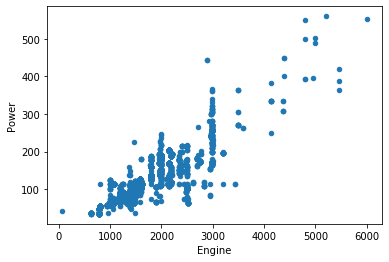

In [720]:
df.plot(kind='scatter',x='Engine',y='Power')
plt.show()

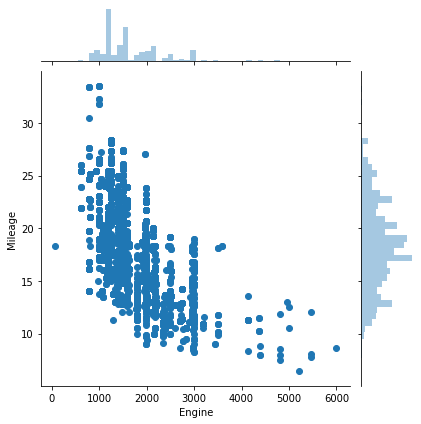

In [721]:
sns.jointplot(kind='scatter',x='Engine',y='Mileage',data=df)
plt.show()

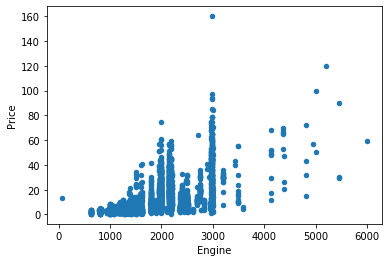

In [722]:
df.plot(kind='scatter',x='Engine',y='Price')
plt.show()

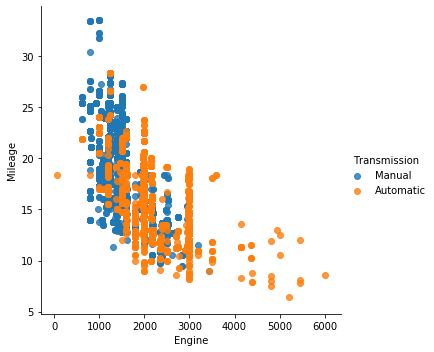

In [723]:
sns.lmplot(x='Engine',y='Mileage',data=df,hue='Transmission',fit_reg=False)
plt.show()

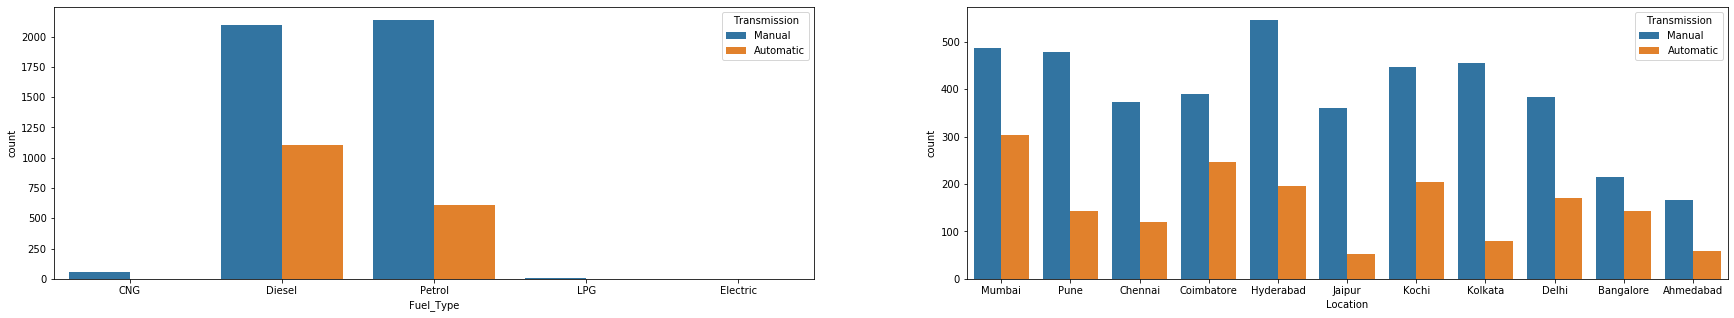

In [724]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.countplot(x='Fuel_Type', hue='Transmission', data=df);
plt.subplot(1,2,2)
sns.countplot(x='Location', hue='Transmission', data=df);
plt.show()

In [725]:
pd.crosstab(df['Brand'], df['Transmission']).T

Brand,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,
Automatic,0,236,267,1,9,0,0,0,39,130,...,6,12,17,18,93,1,11,99,59,20
Manual,1,0,0,0,112,13,28,3,261,478,...,21,79,1,127,80,0,175,312,256,1


# Categorizing the variables 

In [726]:
from sklearn.preprocessing import LabelEncoder
le_brands= LabelEncoder()
le_models = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()

all_brands = list(set(list(df.Brand))) + list(dt.Brand)
all_models = list(set(list(df.Model))) + list(dt.Model)
all_locations = list(set(list(df.Location))) + list(dt.Location)
all_fuel_types = list(set(list(df.Fuel_Type))) + list(dt.Fuel_Type)
all_transmissions = list(set(list(df.Transmission))) + list(dt.Transmission)
all_owner_types = list(set(list(df.Owner_Type))) + list(dt.Owner_Type)

le_brands.fit(all_brands)
le_models.fit(all_models)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)

LabelEncoder()

In [727]:
df['Brand'] = le_brands.transform(df['Brand'])
df['Model'] = le_models.transform(df['Model'])
df['Location'] = le_locations.transform(df['Location'])
df['Fuel_Type'] = le_fuel_types.transform(df['Fuel_Type'])
df['Transmission'] = le_transmissions.transform(df['Transmission'])
df['Owner_Type'] = le_owner_types.transform(df['Owner_Type'])

In [728]:
dt['Brand'] = le_brands.transform(dt['Brand'])
dt['Model'] = le_models.transform(dt['Model'])
dt['Location'] = le_locations.transform(dt['Location'])
dt['Fuel_Type'] = le_fuel_types.transform(dt['Fuel_Type'])
dt['Transmission'] = le_transmissions.transform(dt['Transmission'])
dt['Owner_Type'] = le_owner_types.transform(dt['Owner_Type'])


In [729]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,CarName,Model
0,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75,19,Wagon,1323
1,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50,11,Creta,244
2,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50,10,Jazz,1577
3,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00,19,Ertiga,1605
4,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74,1,A4,1265


In [730]:
#Re-ordering the columns
df = df[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]
dt = dt[['Brand', 'Model', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
      'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [731]:
dt.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,19,1153,4,2014,40929,0,1,0,32.26,998.0,58.200000,4.0
1,19,664,3,2013,54493,4,1,2,24.70,796.0,47.300000,5.0
2,30,920,9,2017,34000,1,1,0,13.68,2393.0,147.800000,7.0
3,30,1215,5,2012,139000,1,1,0,23.59,1364.0,110.350179,5.0
4,11,1238,9,2014,29000,4,1,0,18.50,1197.0,82.850000,5.0


In [732]:
Y_train_data = df.iloc[:, -1]
X_train_data = df.iloc[:,0 : -1]
X_test = dt.iloc[:,:]

In [733]:
from sklearn.model_selection import train_test_split
#Splitting the training set into Training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_data, Y_train_data, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_data = sc.fit_transform(X_train_data)
Y_train_data = Y_train_data.values.reshape((len(Y_train_data), 1))

# Model

In [734]:
#XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 500,learning_rate=0.1, max_depth=4, min_child_weight=2, n_jobs=4)
xgb.fit(X_train, Y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, Y_val)], 
             verbose=False)
Y_pred = xgb.predict(X_val)

[21:51:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [735]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [736]:
#Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred)):
     if Y_pred[i] < 0:
        Y_pred[i] = 0
        
y_true = Y_val

In [737]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from statistics import mean
        
print("Score: ",score(Y_pred,y_true))
print("Mean Absolute Error:",mean_absolute_error(y_true, Y_pred))

Score:  0.9255288293178251
Mean Absolute Error: 1.2946184064462731


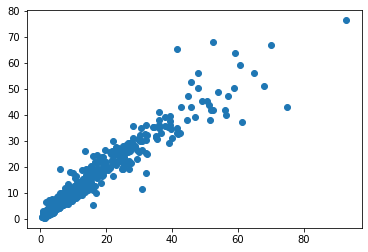

In [738]:
plt.scatter(y_true, Y_pred)

In [739]:
from sklearn import metrics

In [740]:
metrics.explained_variance_score(y_true, Y_pred)

0.9340107850386422

In [741]:
from sklearn.metrics import r2_score
r2_score(y_true, Y_pred)

0.9339661071131617

In [742]:
predictions=xgb.predict(X_test)

In [743]:
predictions

array([ 2.8035684,  2.5773888, 16.741222 , ...,  2.7062101,  5.1920214,
       19.910986 ], dtype=float32)

In [744]:
predictions.mean()

8.986749

In [745]:
df['Price'].mean()

9.479468350224273

In [ ]:
#Saving the predictions to an excel sheet
pd.DataFrame(predictions, columns = ['Price']).to_excel("predictions.xlsx")